In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

df_passageiros=pd.read_parquet('dados/passageiros_unificado.parquet')
df_rotas=pd.read_parquet('dados/rotaaas_historico.parquet')
df_viagens=pd.read_parquet('dados/viagens_historico.parquet')


In [4]:
#linhas que foram extintas/modificadas
rotas_alteradas=df_passageiros.loc[~df_passageiros.route_id.str.lower().isin(df_rotas.route_id.str.lower())][['linha','route_id','data','passageiros_total']]
rotas_alteradas=rotas_alteradas.groupby(['linha','route_id']).agg(data_min=('data', 'min'), data_max=('data', 'max'),periodo_operacao=('data','count'),passageiros=('passageiros_total','sum')).reset_index().sort_values("data_max")
rotas_alteradas=rotas_alteradas[rotas_alteradas['periodo_operacao']>1].reset_index(drop=True)
rotas_alteradas['passageiros/dia']=rotas_alteradas['passageiros']/rotas_alteradas['periodo_operacao']

In [5]:
abc=df_passageiros[(df_passageiros.route_id.str.lower().isin(df_viagens.route_id.str.lower()))&(df_passageiros.route_id.str.lower().isin(df_rotas.route_id.str.lower()))].route_id.drop_duplicates().shape[0]
ab=df_passageiros[(df_passageiros.route_id.str.lower().isin(df_rotas.route_id.str.lower()))].route_id.drop_duplicates().shape[0] - abc
bc= df_rotas[(df_rotas.route_id.str.lower().isin(df_viagens.route_id.str.lower()))].route_id.drop_duplicates().shape[0] - abc
ac=df_passageiros[(df_passageiros.route_id.str.lower().isin(df_viagens.route_id.str.lower()))].route_id.drop_duplicates().shape[0] - abc
a=df_passageiros.route_id.drop_duplicates().shape[0] - abc - ab - ac
b= df_rotas.route_id.drop_duplicates().shape[0] - abc - ab - bc
c=df_viagens.route_id.drop_duplicates().shape[0] - abc - bc - ac

In [6]:
df_rotas[(~df_rotas.route_id.str.lower().isin(df_passageiros.route_id.str.lower()))&(df_rotas.route_id.apply(lambda x: x[:4]).str.lower().isin(df_passageiros.route_id.apply(lambda x: x[:4]).str.lower()))]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color,data_referencia
1456,209P1,1,209P-1,Cachoeirinha - Terminal Pinheiros,3,None,None,201502
2748,209P1,1,209P-1,Cachoeirinha - Terminal Pinheiros,3,None,None,201503
4152,209P1,1,209P-1,Cachoeirinha - Terminal Pinheiros,3,None,None,201504
5552,209P1,1,209P-1,Cachoeirinha - Terminal Pinheiros,3,None,None,201505
6951,209P1,1,209P-1,Cachoeirinha - Terminal Pinheiros,3,None,None,201506
...,...,...,...,...,...,...,...,...
167050,83001,1,8300-1,Term. Pirituba - Term. Lapa,3,509E2F,FFFFFF,202503
167087,87001,1,8700-1,Term. Campo Limpo - Pça. Ramos De Azevedo,3,FF671F,000000,202503
167098,875C1,1,875C-1,Term. Lapa - Metrô Sta. Cruz,3,FF671F,000000,202503
167132,909T1,1,909T-1,Term. Pinheiros - Term. Pq. D. Pedro Ii,3,FF671F,000000,202503


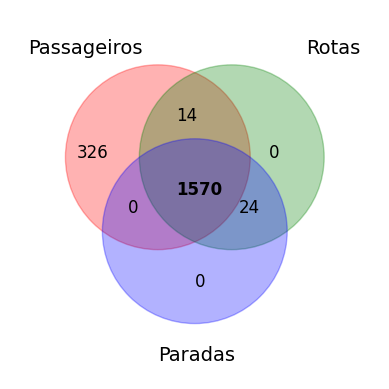

In [10]:

fig, ax = plt.subplots()

# Círculos com transparência
circle_A = Circle((0.4, 0.6), 0.25, color='red', alpha=0.3)
circle_B = Circle((0.6, 0.6), 0.25, color='green', alpha=0.3)
circle_C = Circle((0.5, 0.4), 0.25, color='blue', alpha=0.3)

ax.add_patch(circle_A)
ax.add_patch(circle_B)
ax.add_patch(circle_C)

# Rótulos dos conjuntos
ax.text(0.05, 0.88, 'Passageiros', fontsize=14) #A
ax.text(0.80, 0.88, 'Rotas', fontsize=14) #B
ax.text(0.4, 0.05, 'Paradas', fontsize=14) #C

# Texto nas 7 regiões do diagrama (posições ajustadas manualmente)
ax.text(0.18, 0.60, a, fontsize=12)        # Somente A
ax.text(0.70, 0.60, b, fontsize=12)        # Somente B
ax.text(0.50, 0.25, c, fontsize=12)        # Somente C
ax.text(0.45, 0.70, ab, fontsize=12)       # A ∩ B
ax.text(0.32, 0.45, ac, fontsize=12)       # A ∩ C
ax.text(0.62, 0.45, bc, fontsize=12)       # B ∩ C
ax.text(0.45, 0.50, abc, fontsize=12, fontweight='bold')  # A ∩ B ∩ C

# Estética
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

# plt.title("Diagrama de Venn com as intersecções de rotas entre \n as bases passageiros, paradas e rotas", fontsize=14)
plt.savefig("dados\diagrama_de_venn_intersec_rotas_passageiros_paradas_historico.png")
plt.show()


In [9]:
rotas_alteradas

,linha,route_id,data_min,data_max,periodo_operacao,passageiros,passageiros/dia
0,722810 - PINHEIROS/PCA RAMOS AZEVEDO,722810,2015-01-16,2015-01-21,4,70,17.5
1,640121 - PRAÇA ROGER PATTI,640121,2015-01-13,2015-01-29,2,311070,155535.0
2,211R10 - JD DAS OLIVEIRAS/EST DA LUZ,211R10,2015-01-15,2015-02-14,2,7070,3535.0
3,115651 - PQ EDU CHAVES/PC DA REPUBLICA,115651,2015-01-30,2015-02-18,3,110,36.666667
4,373310 - TERM.SAO MATEUS-METRO PATRIARC,373310,2015-01-02,2015-02-20,17,3546750,208632.352941
...,...,...,...,...,...,...,...
259,9931PR - TERM CIDADE TIRAD/EXPRESS,9931Pr,2015-02-06,2025-12-03,1623,41261104450,25422738.416513
260,9934PR - VIP TERM SANTO AMARO,9934Pr,2015-05-04,2025-12-03,2030,86369774030,42546686.714286
261,9935PR - TERM SANTO AMARO - VIP,9935Pr,2015-05-04,2025-12-03,2050,187714123060,91567864.907317
262,9921PR - TERM CAMPO LIMPO/TRANSPPASS,9921Pr,2015-01-02,2025-12-03,2939,64674864470,22005738.166043


In [8]:
rotas_alteradas_agrupadas=rotas_alteradas.copy()
rotas_alteradas_agrupadas=rotas_alteradas_agrupadas.groupby("route_id").sum()[['passageiros','periodo_operacao']].reset_index()
# Mapeando os valores para os períodos
rotas_alteradas_agrupadas['periodo'] = rotas_alteradas_agrupadas['periodo_operacao'].map(
    lambda x: '<=30 dias' if x <= 30 else ('30-90 dias' if x < 90 and x>30 else ('91-365 dias' if x <= 365 and x>90 else '>365')))

# Mapeando os valores para os passageiros
rotas_alteradas_agrupadas['passageiros'] = rotas_alteradas_agrupadas['passageiros'].map(
    lambda x: '<=100 passageiros' if x <= 100 else ('101-1.000 passageiros' if x <= 1000 and x>100 else ('1001-10000 passageiros' if x <= 10000 and x>1000 else '>10.000')))

# Agrupando e contando valores distintos
rotas_alteradas_agrupadas=rotas_alteradas_agrupadas.groupby(['passageiros', 'periodo'])['route_id'].nunique().reset_index().drop_duplicates().sort_values("route_id").pivot(columns='passageiros', index='periodo', values='route_id').fillna(0)
print(rotas_alteradas_agrupadas.to_latex())

\begin{tabular}{lrrrr}
\toprule
passageiros &  1001-10000 passageiros &  101-1.000 passageiros &  <=100 passageiros &  >10.000 \\
periodo     &                         &                        &                    &          \\
\midrule
30-90 dias  &                     0.0 &                    0.0 &                0.0 &     20.0 \\
91-365 dias &                     0.0 &                    0.0 &                0.0 &     10.0 \\
<=30 dias   &                    10.0 &                    2.0 &                2.0 &    164.0 \\
>365        &                     0.0 &                    0.0 &                0.0 &     56.0 \\
\bottomrule
\end{tabular}



C:\Users\franc\AppData\Local\Temp\ipykernel_18416\4136579423.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rotas_alteradas_agrupadas=rotas_alteradas_agrupadas.groupby("route_id").sum()[['passageiros','periodo_operacao']].reset_index()
C:\Users\franc\AppData\Local\Temp\ipykernel_18416\4136579423.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(rotas_alteradas_agrupadas.to_latex())
